In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import os
from matplotlib_venn import venn2
from matplotlib_venn import venn3

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\PBMC_Hao\GSE164378_Hao\Batch_corrected\Hao_PBMC_Harmony_unscaled.h5ad")
# print('Original adata:', adata.shape)
# adata.obs['celltype.l1'] = adata.obs['celltype.l1'].str.replace(' ', '_')
# label = adata.obs['celltype.l1'].tolist()
# types = np.unique(label).tolist()
# print('all cell types:', types)
# print('====================')
# del adata


In [3]:
types = ['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']

In [7]:
import os
os.chdir('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch/Level1/feature_selection')

features_dict = {}
# Read features for each celltype
for celltype in types:
    try:
        feature_df = pd.read_csv(f'{celltype}_features.txt', names=['Gene', 'Weight', 'Tendency'], sep='\t')
        feature_df['abs_weight'] = feature_df['Weight'].abs()
        feature_df = feature_df.sort_values(by=['Tendency', 'abs_weight'], ascending=[False, False])
        feature_df.drop(columns=['abs_weight'], inplace=True)
        features_dict[celltype] = feature_df
    except:
        print('skipping:', celltype)
        continue
    # print(celltype, 'Feature count:', feature_df.shape[0])
    # print(celltype, 'Positive feature count:', feature_df[feature_df['Tendency'] == 1].shape[0])
    # print('------------------')

In [8]:
count_df = pd.DataFrame(columns=['Feature_count', 'Positive_feature_count'])
for celltype in features_dict.keys():
    feature_df = features_dict[celltype]
    feature_count = feature_df.shape[0]
    positive_count = feature_df[feature_df['Tendency'] == 1].shape[0]
    count_df.loc[celltype] = [feature_count, positive_count]
count_df

,Feature_count,Positive_feature_count
B,11,6
CD4_T,346,197
CD8_T,22,7
DC,32,15
Mono,19,10
NK,33,17
other,4,2
other_T,59,25


In [13]:
# ACT processed marker list
marker_df = pd.read_csv('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch/Level1/ACT_marker/marker_list/Human_blood_marker_processed.csv')
marker_df.head()

,Species,Tissue,super_type,CellType,Marker,Resource
0,Human,Blood,B,Activated B cell,"CD5, MIR155HG, TAGLN2","35025971, 28910360, 2474446"
1,Human,Blood,T_CD4,"Activated CD4-positive, alpha-beta T cell","CD4, CCR6, CD14, CD19, CD38, CD3D, CD3G, CD69,...","35381424, 32783921, 35831277, 34529726, 103413..."
2,Human,Blood,T_CD4,"Activated CD4-positive, CD25-positive, CCR4-po...","CD3D, CD3E, CD3G, CD4, FOXP3",30977974
3,Human,Blood,NaN,Adult endothelial progenitor cell,"KDR, PROM1, CD34, PTPRC, PECAM1, CD14","27561827, 29391882, 24641802, 29147957, 267700..."
4,Human,Blood,T,Alpha-beta T cell,"CD3D, CD3E, CD3G, IL7R","34284174, 28777444"


In [70]:
def compare_PreLect_w_ACT(PreLect_celltype, db_markers, PreLect_dict, name=''):
    if name == '':
        name = PreLect_celltype
    # Extracting PreLect features
    features = PreLect_dict[PreLect_celltype]['Gene'].tolist()
    # Extracting ACT markers
    # marker_genes = marker_df[marker_df['CellType'] == db_celltype]['Marker'].tolist()
    # print(marker_genes)
    # marker_genes = marker_genes[0].split(', ')
    # marker_genes = marker_df['official gene symbol'].tolist()

    # Finding common elements
    features_set = set(features)
    marker_genes_set = set(db_markers)
    common = list(features_set & marker_genes_set)
    print(celltype, 'common with markers:', len(common))
    
    # Plotting Venn diagram
    plt.figure(figsize=(8, 5))
    v = venn2([features_set, marker_genes_set], set_labels=('PreLect', f'{name} Marker'))
    plt.title(name, fontsize=16)

    for text in v.set_labels:
        text.set_fontsize(14)
    for text in v.subset_labels:
        text.set_fontsize(16)
    plt.show()

    return common


## B

other_T common with markers: 6


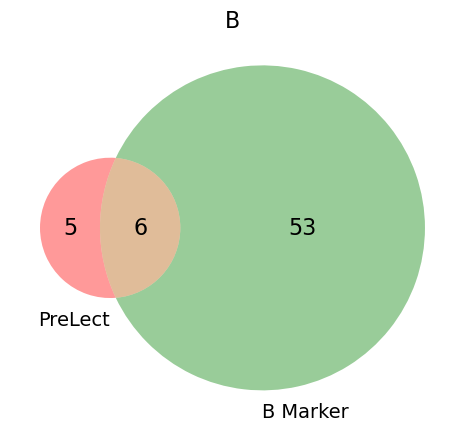

B_common: ['MS4A1', 'CD79A', 'HLA-DRA', 'IGHM', 'CD74', 'IGKC']


In [36]:
B_common = compare_PreLect_w_ACT('B', 'B cell', features_dict, marker_df)
print('B_common:', B_common)

## Check T cell markers

In [39]:
marker_df.head()

,Species,Tissue,super_type,CellType,Marker,Resource
0,Human,Blood,B,Activated B cell,"CD5, MIR155HG, TAGLN2","35025971, 28910360, 2474446"
1,Human,Blood,T_CD4,"Activated CD4-positive, alpha-beta T cell","CD4, CCR6, CD14, CD19, CD38, CD3D, CD3G, CD69,...","35381424, 32783921, 35831277, 34529726, 103413..."
2,Human,Blood,T_CD4,"Activated CD4-positive, CD25-positive, CCR4-po...","CD3D, CD3E, CD3G, CD4, FOXP3",30977974
3,Human,Blood,NaN,Adult endothelial progenitor cell,"KDR, PROM1, CD34, PTPRC, PECAM1, CD14","27561827, 29391882, 24641802, 29147957, 267700..."
4,Human,Blood,T,Alpha-beta T cell,"CD3D, CD3E, CD3G, IL7R","34284174, 28777444"


In [44]:
t_cell = marker_df[marker_df['CellType'] == 'T cell']['Marker'].tolist()[0].split(', ')
print(t_cell)
cd4_tcm = marker_df[marker_df['super_type'] == 'T_CD4_Tcm']['Marker'].tolist()[0].split(', ')
print(cd4_tcm)
tcm = marker_df[marker_df['super_type'] == 'T_cm']['Marker'].tolist()[0].split(', ')
print(tcm)

['CD3D', 'CD3E', 'CD3G', 'IL7R', 'CD8A', 'IL2RA', 'CCR7', 'CD2', 'CD4', 'MKI67', 'TRAC', 'CD27', 'CD8B', 'CTLA4', 'GNLY', 'NKG7', 'PDCD1', 'PTPRC', 'TRBC1', 'CCL20', 'CD28', 'CD5', 'CD7', 'PRF1', 'TRBC2', 'ACTB', 'AIF1', 'AP1S2', 'ATP2B1', 'B3GAT1', 'BCL2', 'BTLA', 'C15orf48', 'CADM1', 'CCL3', 'CCL5', 'CD101', 'CD247', 'CD36', 'CD6', 'CD69', 'CXCL1', 'CXCL2', 'CXCL3', 'CXCL5', 'CXCL8', 'CXCR4', 'CYBB', 'CYP1B1', 'DMP1', 'DPP4', 'DUSP1', 'DUSP6', 'EREG', 'FAS', 'FASLG', 'FCN1', 'FOS', 'FOXP3', 'FTH1', 'FTL', 'GNG4', 'GZMA', 'GZMH', 'H3-3B', 'HAVCR2', 'HMGB2', 'IER3', 'IL17A', 'IL17F', 'IL1B', 'IL1R1', 'IL22', 'IL26', 'IL3', 'ISG20', 'ITGB2', 'KLRB1', 'KLRD1', 'LDHB', 'LEF1', 'LPAR6', 'LRRC32', 'LST1', 'LTB', 'LYZ', 'MARCKS', 'MNDA', 'MPEG1', 'NAMPT', 'NCR3', 'PCLAF', 'PECAM1', 'PPBP', 'PSAP', 'PTGS2', 'S100A12', 'S100A8', 'S100A9', 'SELL', 'SERPINB2', 'SRGN', 'STMN1', 'TCF7', 'TIGIT', 'TNF', 'TNFRSF8', 'TNFSF8', 'TOP2A', 'TOX', 'TYMS', 'UCHL1', 'VCAN', 'ZBED2', 'ZFP36L2', 'ZNF683']
['CC

5


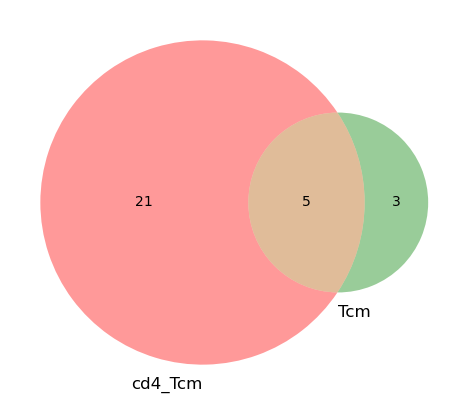

In [46]:
# intersection of CD4_Tcm and Tcm
cd4_tcm_set = set(cd4_tcm)
tcm_set = set(tcm)
common = list(cd4_tcm_set & tcm_set)
print(len(common))

# Plotting Venn diagram
plt.figure(figsize=(8, 5))
v = venn2([cd4_tcm_set, tcm_set], set_labels=('cd4_Tcm', 'Tcm'))  # , set_labels=('PreLect', f'{name} Marker')

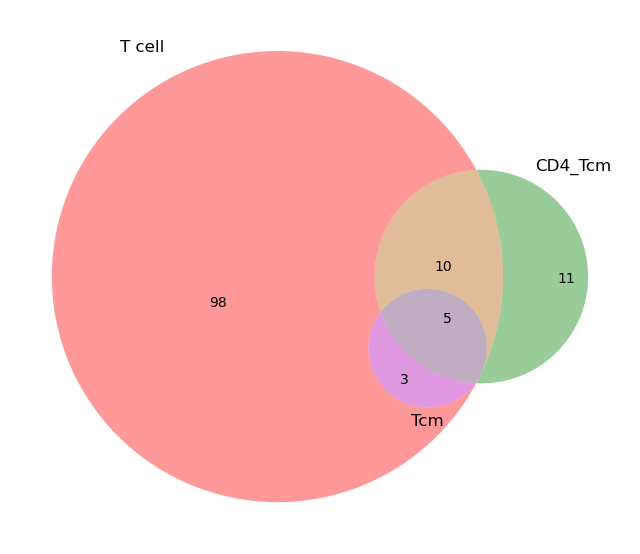

In [48]:
from matplotlib_venn import venn3

# intersection of "T cell" and other subtypes
t_cell_set = set(t_cell)
plt.figure(figsize=(8, 8))
v = venn3([t_cell_set, cd4_tcm_set, tcm_set], set_labels=('T cell', 'CD4_Tcm', 'Tcm'))

['KLRB1', 'CD4', 'CCL5', 'CCR6', 'CCR7', 'CD3E', 'GZMK', 'IL7R', 'TNFSF13B', 'AQP3', 'CD27', 'CD28', 'CD3D', 'CD3G', 'CXCR6', 'GNLY', 'GZMA', 'ITGB1', 'PRDM1', 'PRF1', 'PTPRC']
['CCL4', 'CCL5', 'CCR7', 'CD28', 'CD3D', 'CD3E', 'CD3G', 'CD4', 'CST7', 'FAS', 'GNLY', 'GZMA', 'GZMH', 'GZMK', 'NKG7', 'SELL', 'CCR7', 'GZMK', 'PTPRC']
11


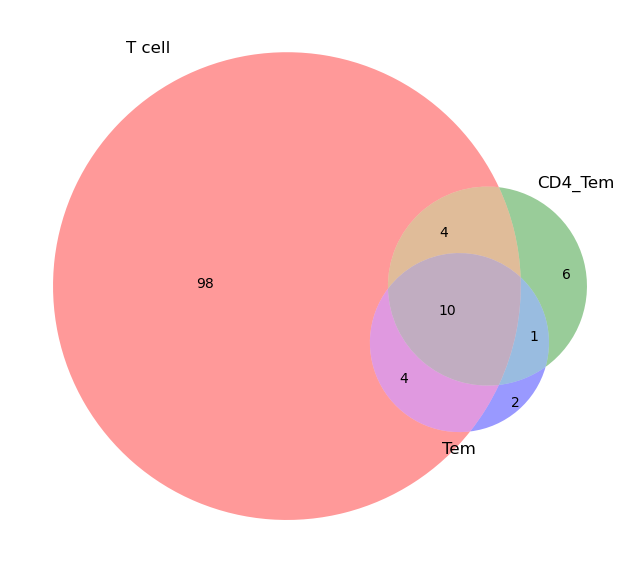

In [52]:
# intersection of cd4_Tem and Tem
cd4_tem = marker_df[marker_df['super_type'] == 'T_CD4_Tem']['Marker'].tolist()[0].split(', ')
print(cd4_tem)
tem = []
for item in marker_df[marker_df['super_type'] == 'T_em']['Marker'].tolist():
    tem += item.split(', ')
print(tem)

cd4_tem_set = set(cd4_tem)
tem_set = set(tem)
common = list(cd4_tem_set & tem_set)
print(len(common))
# plt.figure(figsize=(8, 5))
# v = venn2([cd4_tem_set, tem_set], set_labels=('cd4_Tem', 'Tem'))
plt.figure(figsize=(8, 8))
v = venn3([t_cell_set, cd4_tem_set, tem_set], set_labels=('T cell', 'CD4_Tem', 'Tem'))


## CD4 T vs CD4 alpha-beta T cell (ACT)

other_T common with markers: 14


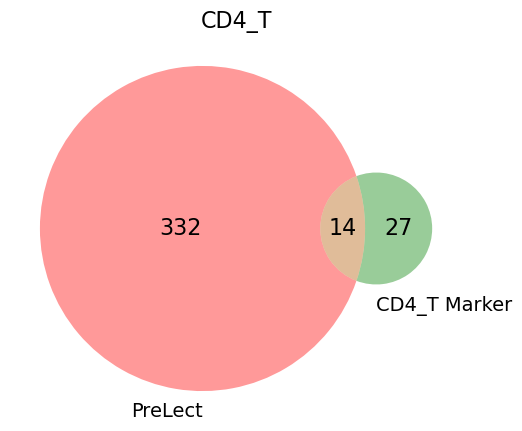

In [53]:
cd4T_common = compare_PreLect_w_ACT('CD4_T', 'CD4-positive, alpha-beta T cell', features_dict, marker_df)

## CD4 T vs all CD4 (ACT)

In [66]:
marker_df = marker_df.fillna('')

all_cd4 = []
for index, row in marker_df[marker_df['super_type'].str.contains('T_CD4')].iterrows():
    print('adding marker for:', row['CellType'])
    all_cd4 += row['Marker'].split(', ')

adding marker for: Activated CD4-positive, alpha-beta T cell
adding marker for: Activated CD4-positive, CD25-positive, CCR4-positive, alpha-beta regulatory T cell, human
adding marker for: CD4-positive helper T cell
adding marker for: CD4-positive, alpha-beta cytotoxic T cell
adding marker for: CD4-positive, alpha-beta memory T cell
adding marker for: CD4-positive, alpha-beta T cell
adding marker for: CD4-positive, CD25-positive, alpha-beta regulatory T cell
adding marker for: CD4-positive, CD25-positive, CD127-high, alpha-beta regulatory T cell
adding marker for: Central memory CD4-positive, alpha-beta T cell
adding marker for: Effector CD4-positive, alpha-beta T cell
adding marker for: Effector memory CD4-positive, alpha-beta T cell
adding marker for: Naive thymus-derived CD4-positive, alpha-beta T cell
adding marker for: Proliferating CD4-positive, alpha-beta T cell


In [67]:
len(all_cd4)

167

In [68]:
len(set(all_cd4))

82

other_T common with markers: 29


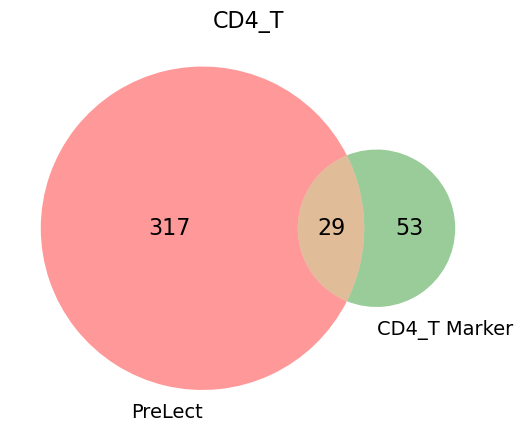

In [71]:
# intersection of PreLect CD4_T and ACT all CD4_T markers
cd4T_common = compare_PreLect_w_ACT('CD4_T', all_cd4, features_dict)

## CD8 T vs CD8 alpha-beta T cell (ACT)

other_T common with markers: 7


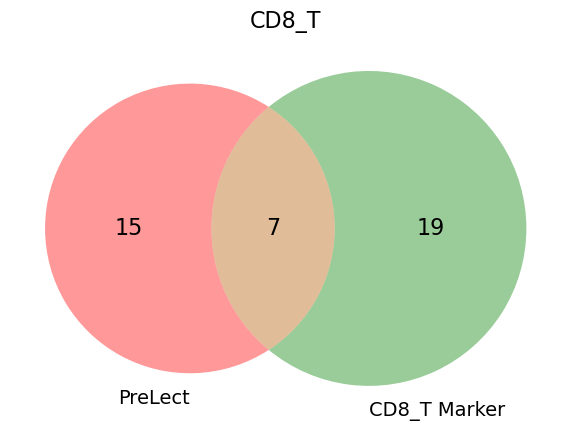

In [78]:
cd8T_ab = marker_df[marker_df['CellType'] == 'CD8-positive, alpha-beta T cell']['Marker'].tolist()[0].split(', ')
cd8T_common_sub = compare_PreLect_w_ACT('CD8_T', cd8T_ab, features_dict)

## CD8 T vs all CD8 (ACT)

In [72]:
all_cd8 = []
for index, row in marker_df[marker_df['super_type'].str.contains('T_CD8')].iterrows():
    print('adding marker for:', row['CellType'])
    all_cd8 += row['Marker'].split(', ')

adding marker for: CD8-positive, alpha-beta cytotoxic T cell
adding marker for: CD8-positive, alpha-beta memory T cell
adding marker for: CD8-positive, alpha-beta regulatory T cell
adding marker for: CD8-positive, alpha-beta T cell
adding marker for: Central memory CD8-positive, alpha-beta T cell
adding marker for: Effector CD8-positive, alpha-beta T cell
adding marker for: Effector memory CD8-positive, alpha-beta T cell
adding marker for: Effector memory CD8-positive, alpha-beta T cell, terminally differentiated
adding marker for: Naive thymus-derived CD8-positive, alpha-beta T cell


other_T common with markers: 9


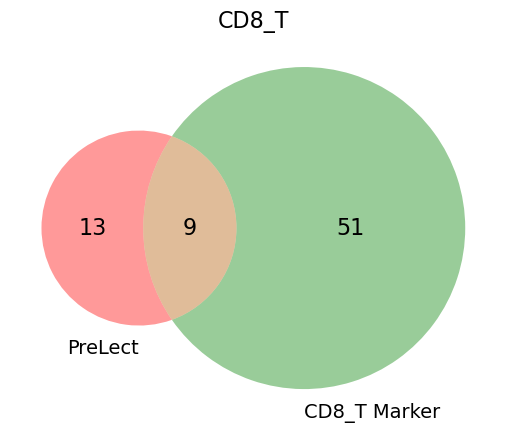

In [76]:
cd8T_common = compare_PreLect_w_ACT('CD8_T', all_cd8, features_dict)

## DC

In [81]:
dc = marker_df[marker_df['CellType'] == 'Dendritic cell']['Marker'].tolist()[0].split(', ')

other_T common with markers: 6


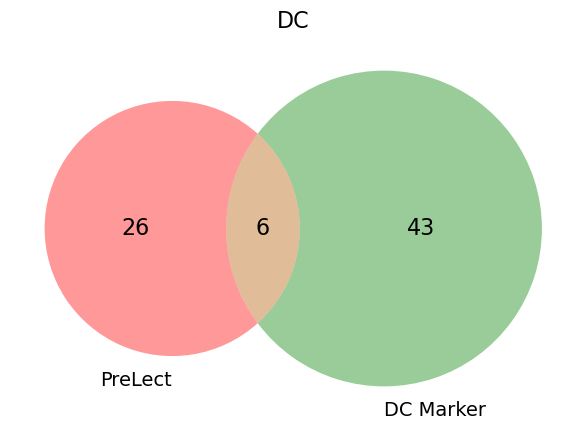

In [83]:
dc_common = compare_PreLect_w_ACT('DC', dc, features_dict)

## Mono

In [85]:
mono = marker_df[marker_df['CellType'] == 'Monocyte']['Marker'].tolist()[0].split(', ')
mono_classical = marker_df[marker_df['CellType'] == 'Classical monocyte']['Marker'].tolist()[0].split(', ')
mono_nonclassical = marker_df[marker_df['CellType'] == 'Non-classical monocyte']['Marker'].tolist()[0].split(', ')

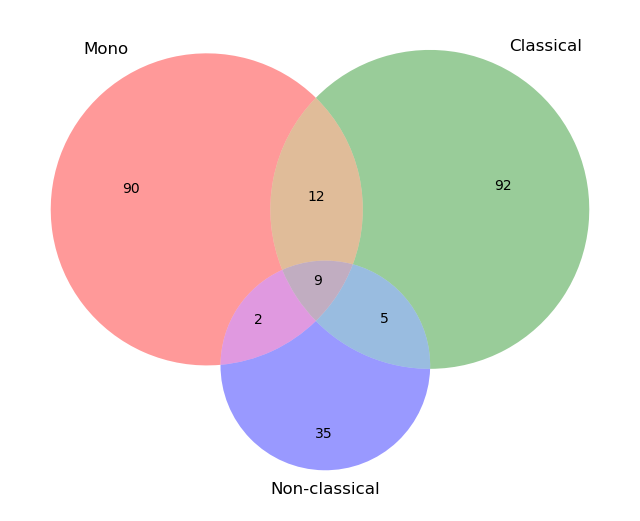

In [86]:
plt.figure(figsize=(8, 8))
v = venn3([set(mono), set(mono_classical), set(mono_nonclassical)], set_labels=('Mono', 'Classical', 'Non-classical'))

other_T common with markers: 9


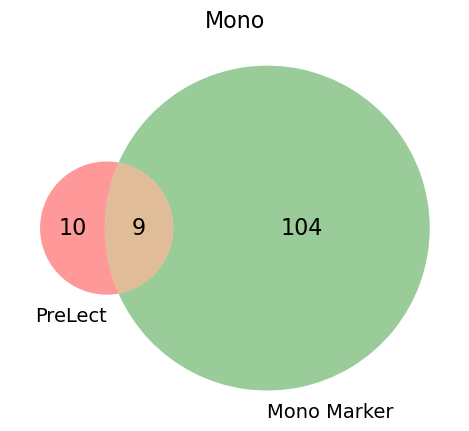

In [87]:
mono_common = compare_PreLect_w_ACT('Mono', mono, features_dict)

## NK

In [91]:
nk = marker_df[marker_df['CellType'] == 'Natural killer cell']['Marker'].tolist()[0].split(', ')
len(nk)

74

other_T common with markers: 10


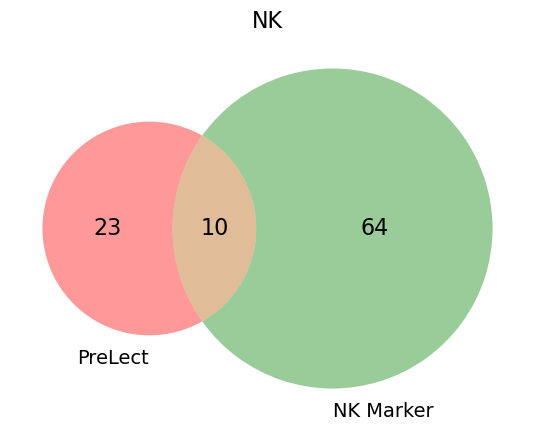

In [92]:
nk_common = compare_PreLect_w_ACT('NK', nk, features_dict)